# Exercises 12 - 08/01/2024

In [ ]:
!pip install iminuit # colab stuff

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import iminuit
from iminuit import Minuit
import scipy as sc
from scipy.stats import norm,expon
from iminuit.cost import ExtendedBinnedNLL

In [ ]:
def sturges (N_events) :
     return int( np.ceil( 1 + 3.322 * np.log(N_events) ) )

Write a program that fits the events saved in the file dati.txt.

Take care to determine the range and binning of the histogram used for the fit based on the events themselves, writing appropriate algorithms to determine the minimum and maximum of the sample and a reasonable estimate of the number of bins to use.

Determine the initial values of the fit parameters using the techniques described in the lesson.

Print the fit result on the screen.

Plot the histogram with the fitted model overlaid.

Which parameters are correlated, and which are anti-correlated with each other?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dati.txt to dati.txt


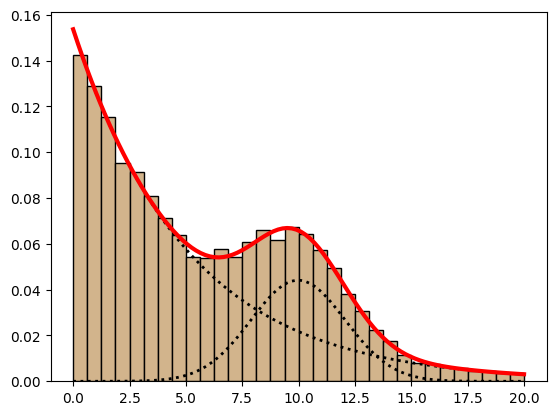

┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │      1.2e+04       -2.906        6.145     -0.011e6       -8.496 │
│           mu │       -2.906      0.00627       -0.002        3.087        0.001 │
│        sigma │        6.145       -0.002      0.00707       -6.893       -0.005 │
│ N_background │     -0.011e6        3.087       -6.893     2.04e+04       10.271 │
│          tau │       -8.496        0.001       -0.005       10.271       0.0131 │
└──────────────┴──────────────────────────────────────────────────────────────────┘


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 18.16 (χ²/ndof = 0.7)      │              Nfcn = 282              │
│ EDM = 1.22e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal     │  2.31e3   │  0.11e3   │            │            │         │         │       │
│ 1 │ mu           │   9.97    │   0.08    │            │            │         │         │       │
│ 2 │ sigma        │   2.09    │   0.08    │            │            │         │         │       │
│ 3 │ N_background │  7.85e3   │  0.14e3   │            │            │         │         │       │
│ 4 │ tau          │   5.11    │   0.11    │            │            │         │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │      1.2e+04       -2.906        6.145     -0.011e6       -8.496 │
│           mu │       -2.906      0.00627       -0.002        3.087        0.001 │
│        sigma │        6.145       -0.002      0.00707       -6.893       -0.005 │
│ N_background │     -0.011e6        3.087       -6.893     2.04e+04       10.271 │
│          tau │       -8.496        0.001       -0.005       10.271       0.0131 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

In [ ]:
data = np.loadtxt('dati.txt',dtype = np.float64)
N = len(data)

def mod_total (bin_edges, N_signal, mu, sigma, N_background, tau):
    return N_signal * norm.cdf (bin_edges, mu, sigma) + \
            N_background * expon.cdf (bin_edges, 0, tau )

bin_edges = np.linspace(min(data),max(data),sturges(N))
bin_width = bin_edges[1]-bin_edges[0]
bin_content = np.array([len(list(filter(lambda x: x >= i and x < i + bin_width,data))) for i in bin_edges[:-1]]) # aggiustare
my_cost_func = ExtendedBinnedNLL (bin_content, bin_edges, mod_total)

my_minuit = Minuit (my_cost_func,
                    N_signal = N, mu = np.mean(data), sigma = np.std(data), # signal input parameters
                    N_background = N, tau = 5)

my_minuit.migrad()

X = np.linspace(min(data),max(data),100)

plt.hist(data,bins = sturges(len(data)),edgecolor='black',color='tan', density=True)

plt.plot(X,my_minuit.values['N_background']/N * expon.pdf(X,0,my_minuit.values['tau']), \
         linestyle='dotted',linewidth=2, color='black')
plt.plot(X, my_minuit.values['N_signal']/N * norm.pdf(X,loc=my_minuit.values['mu'],scale=my_minuit.values['sigma']), \
         linestyle='dotted',linewidth=2, color='black')
plt.plot(X, \
         my_minuit.values['N_background']/N * expon.pdf(X,0,my_minuit.values['tau']) + \
         my_minuit.values['N_signal']/N * norm.pdf(X,loc=my_minuit.values['mu'],scale=my_minuit.values['sigma']), \
         linewidth=3, color='red')

plt.show()
print(my_minuit.covariance)
display (my_minuit)

## Exercise 12.2

Generate a file dati_2.txt containing 10,000 events distributed according to a Gaussian probability distribution.

Write a program that fits the events saved in the file dati_2.txt using the binned and unbinned maximum likelihood methods, and compare the results of the two techniques

In [ ]:
N = 10000
gauss_data = np.random.normal(size=N,loc=5,scale=10)
# np.savetxt('dati_2.txt', gauss_data, delimiter='\n')
# binned

def mod_total_bin (bin_edges,N, mu, sigma):
    return N*norm.cdf(bin_edges, mu, sigma)

bin_edges = np.linspace(min(gauss_data),max(gauss_data),sturges(N))
bin_width = bin_edges[1]-bin_edges[0]
bin_content = np.array([len(list(filter(lambda x: x >= i and x < i + bin_width, gauss_data))) for i in bin_edges[:-1]]) # aggiustare

my_cost_func_bin = ExtendedBinnedNLL(bin_content, bin_edges, mod_total_bin)

binned_minuit = Minuit (my_cost_func_bin,N=N, mu = np.mean(gauss_data), sigma = np.std(gauss_data))
binned_minuit.migrad()
display(binned_minuit)


# unbinned
def mod_signal_unb (x, mu, sigma) :
    return norm.pdf(x, mu, sigma)

from iminuit.cost import UnbinnedNLL
my_cost_func_unb = UnbinnedNLL (gauss_data, mod_signal_unb)

unbinned_minuit = Minuit (my_cost_func_unb, mu = np.mean(gauss_data), sigma = np.std(gauss_data))
unbinned_minuit.migrad()
display(unbinned_minuit)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 17.1 (χ²/ndof = 0.6)       │              Nfcn = 36               │
│ EDM = 2.35e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │  10.0e3   │   0.1e3   │            │            │         │         │       │
│ 1 │ mu    │   5.07    │   0.10    │            │            │         │         │       │
│ 2 │ sigma │   9.90    │   0.07    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────┐
│       │       N      mu   sigma │
├───────┼─────────────────────────┤
│     N │   1e+04   0.005   0.019 │
│    mu │   0.005 0.00989   0.000 │
│ sigma │   0.019   0.000 0.00508 │
└───────┴─────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.421e+04                  │              Nfcn = 24               │
│ EDM = 2.78e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   5.06    │   0.10    │            │            │         │         │       │
│ 1 │ sigma │   9.89    │   0.07    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────┐
│       │      mu   sigma │
├───────┼─────────────────┤
│    mu │ 0.00978   0.000 │
│ sigma │   0.000 0.00489 │
└───────┴─────────────────┘

## Exercise 12.3
Insert the source code of the previous exercise into a loop that performs the comparison as the number of events considered for the fit varies, from 20 to 10000, with a regular log-scale increment.

Use different plots to show the behavior of the parameters and their uncertainties as the number of events changes, for both types of estimators.

Add to the comparison the fit performed with the least squares method.

Which estimator is less biased at low statistics?

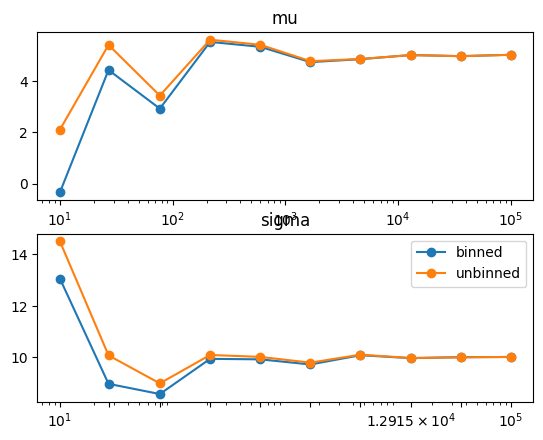

In [ ]:
unbinned_mu = []
binned_mu = []
unbinned_sigma = []
binned_sigma = []

X =  np.logspace(1,5,10,endpoint=True,dtype=np.int64)
for N in X:
  gauss_data = np.random.normal(size=N,loc=5,scale=10)
  def mod_total_bin (bin_edges, mu, sigma):
      return norm.cdf(bin_edges, mu, sigma)

  bin_edges = np.linspace(min(gauss_data),max(gauss_data),sturges(N))
  bin_width = bin_edges[1]-bin_edges[0]
  bin_content = np.array([len(list(filter(lambda x: x >= i and x < i + bin_width, gauss_data))) for i in bin_edges[:-1]]) # aggiustare

  my_cost_func_bin = ExtendedBinnedNLL(bin_content, bin_edges, mod_total_bin)

  binned_minuit = Minuit (my_cost_func_bin, mu = np.mean(gauss_data), sigma = np.std(gauss_data))
  binned_minuit.migrad()

  def mod_signal_unb (x, mu, sigma) :
      return norm.pdf(x, mu, sigma)

  from iminuit.cost import UnbinnedNLL
  my_cost_func_unb = UnbinnedNLL (gauss_data, mod_signal_unb)

  unbinned_minuit = Minuit (my_cost_func_unb, mu = np.mean(gauss_data), sigma = np.std(gauss_data))
  unbinned_minuit.migrad()

  binned_mu.append(binned_minuit.values['mu'])
  unbinned_mu.append(unbinned_minuit.values['mu'])
  binned_sigma.append(binned_minuit.values['sigma'])
  unbinned_sigma.append(unbinned_minuit.values['sigma'])

fig, ax = plt.subplots (nrows = 2, ncols = 1)
ax[0].plot(X,binned_mu, label='binned', linestyle='solid', marker='o')
ax[1].plot(X,binned_sigma,  label='binned', linestyle='solid', marker='o')
ax[0].plot(X,unbinned_mu,  label='unbinned', linestyle='solid', marker='o')
ax[1].plot(X,unbinned_sigma,  label='unbinned', linestyle='solid', marker='o')
ax[0].set_title('mu')
ax[0].set_xscale('log')
# ax[0].set_xticks(X)
ax[1].set_title('sigma')
ax[1].set_xscale('log')
ax[1].set_xticks(X)

# plt.errorbar(X,binned_mu,yerr=binned_sigma, ecolor='black',capsize=2)
# plt.errorbar(X,unbinned_mu,yerr=unbinned_sigma,ecolor='black',capsize=2)
# plt.xscale('log')
plt.legend()
plt.show()